In [10]:
import keras
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
keras.__version__

'2.9.0'

In [11]:
#importing the dataset 
from keras.datasets import mnist
(train_X , train_Y), (test_X , test_Y) = mnist.load_data ()

In [12]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5

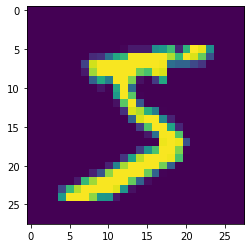

In [13]:
plt.imshow(train_X[0])
train_Y[0]

PREPROCESSING DATA 

In [14]:
#Converting the output variable to one hot vector 
train_y = tf.keras.utils.to_categorical(train_Y, num_classes= 10)
test_y = tf.keras.utils.to_categorical(test_Y, num_classes= 10)
print(train_Y[0])
print(train_y[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
#Scale pixel values such that they lie between 0.0 and 1.0 
def scale_pixels(image):
    result = (np.copy(image)).astype(np.single)
    for i in range(len(image)):
        for j in range(len(image[0])):
            result[i,j] = (image[i,j])/255
    return result

def scale_images(images):
    result = (np.copy(images)).astype(np.single)
    for i in range(len(images)):
        result[i] = scale_pixels(images[i])
    return result

In [16]:
train_x = scale_images(train_X)
test_x = scale_images(test_X)

In [17]:
print(train_x[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Implementation 

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
def create_cnn():
  # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3) ,
            activation= 'relu' ,
            kernel_initializer = 'he_uniform' ,
            input_shape =(28 , 28 , 1) 
        )
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2 , 2)))
    # Flat ten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(
        Dense(100,
        activation = 'relu' ,
        kernel_initializer = 'he_uniform')
    )
    model.add(Dense(10, activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr = 0.01, momentum = 0.9)
    # compile model
    model.compile (
        optimizer = opt,
        loss = 'categorical_crossentropy' ,
        metrics = ['accuracy']
    )
    return model

In [19]:
model = create_cnn()

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [20]:
model.layers

Training and Evaluating CNN

In [21]:
#Training model 
x_val = train_x[-10000:]
y_val = train_y[-10000:]
print("Fit model on training data")
history = model.fit(
    train_x,
    train_y,
    batch_size=32,
    epochs=5,
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1524 - accuracy: 0.9539 - val_loss: 0.0594 - val_accuracy: 0.9820
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0528 - accuracy: 0.9841 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0194 - val_accuracy: 0.9949
Epoch 4/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0244 - accuracy: 0.9929 - val_loss: 0.0174 - val_accuracy: 0.9948
Epoch 5/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0104 - val_accuracy: 0.9974


In [22]:
#Evaluating model 
x_test = test_x
y_test = test_y
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 2s 21ms/step - loss: 0.0402 - accuracy: 0.9874
test loss, test acc: [0.040199313312768936, 0.9873999953269958]


Experimentation - Part i) 

In [23]:
#Part i) 
#Run the training for 50 epochs
epoch_history = model.fit(
    train_x,
    train_y, 
    batch_size = 32,
    epochs = 50,
    validation_split = 0.1
)

Epoch 1/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0144 - val_accuracy: 0.9952
Epoch 2/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0119 - val_accuracy: 0.9968
Epoch 3/50
1688/1688 [==============================] - 48s 28ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.0108 - val_accuracy: 0.9968
Epoch 4/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0105 - val_accuracy: 0.9973
Epoch 5/50
1688/1688 [==============================] - 40s 23ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.0101 - val_accuracy: 0.9972
Epoch 6/50
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0110 - val_accuracy: 0.9963
Epoch 7/50
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0117 -

In [24]:
# print validation and training accuracy over epochs
print(epoch_history.history['accuracy'])
print(epoch_history.history['val_accuracy'])

[0.9966852068901062, 0.9977592825889587, 0.9989814758300781, 0.9995926022529602, 0.9997592568397522, 0.9998518228530884, 0.9999259114265442, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9951666593551636, 0.996833324432373, 0.996833324432373, 0.9973333477973938, 0.9971666932106018, 0.9963333606719971, 0.9971666932106018, 0.9965000152587891, 0.996999979019165, 0.996666669845581, 0.996999979019165, 0.996666669845581, 0.9961666464805603, 0.9965000152587891, 0.996833324432373, 0.996666669845581, 0.9965000152587891, 0.996666669845581, 0.996666669845581, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.9963333606719971, 0.9963333606719971, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.9965000152587891, 0.99650001525

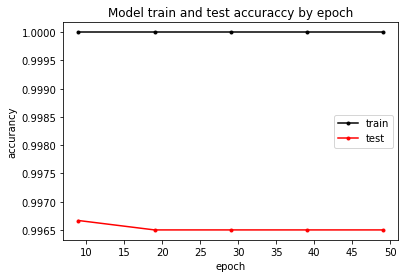

In [25]:
#Visualize 
def visualize_accuracy(history, num_epoch=50):
    acc = []
    val_acc = []
    for i in range(9, num_epoch, 10):
        acc.append(history.history['accuracy'][i])
        val_acc.append(history.history['val_accuracy'][i])
    plt.plot(list(range(9, num_epoch, 10)), acc, '.r-', color="black")
    plt.plot(list(range(9, num_epoch, 10)), val_acc, '.r-', color="red")
    plt.xlabel('epoch')
    plt.ylabel('accurancy')
    plt.title('Model train and test accuraccy by epoch')
    plt.legend(labels=['train', 'test'])
    plt.show()
visualize_accuracy(epoch_history)

Experimentation - Part ii) 

In [26]:
#adding dropout to the pre4vious model 
from keras.layers import Dropout
def create_cnn_dropout():
  # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3) ,
            activation= 'relu' ,
            kernel_initializer = 'he_uniform' ,
            input_shape =(28 , 28 , 1) 
        )
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2 , 2)))
    # Flat ten output
    model.add(Flatten())
    #add dropout 
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
        Dense(100,
        activation = 'relu' ,
        kernel_initializer = 'he_uniform')
    )
    model.add(Dense(10, activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr = 0.01, momentum = 0.9)
    # compile model
    model.compile (
        optimizer = opt,
        loss = 'categorical_crossentropy' ,
        metrics = ['accuracy']
    )
    return model

In [27]:
dropout_model = create_cnn_dropout()

In [ ]:
#Run the training for 50 epochs with dropout model 
epoch_history_dropout = dropout_model.fit(
    train_x,
    train_y, 
    batch_size = 32,
    epochs = 50,
    validation_split = 0.1
)


Epoch 1/50
1688/1688 [==============================] - 45s 26ms/step - loss: 0.2202 - accuracy: 0.9300 - val_loss: 0.0674 - val_accuracy: 0.9827
Epoch 2/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0912 - accuracy: 0.9719 - val_loss: 0.0508 - val_accuracy: 0.9867
Epoch 3/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0697 - accuracy: 0.9781 - val_loss: 0.0465 - val_accuracy: 0.9878
Epoch 4/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0542 - accuracy: 0.9825 - val_loss: 0.0399 - val_accuracy: 0.9888
Epoch 5/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0487 - accuracy: 0.9839 - val_loss: 0.0430 - val_accuracy: 0.9887
Epoch 6/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0407 - accuracy: 0.9862 - val_loss: 0.0389 - val_accuracy: 0.9898
Epoch 7/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0363 -

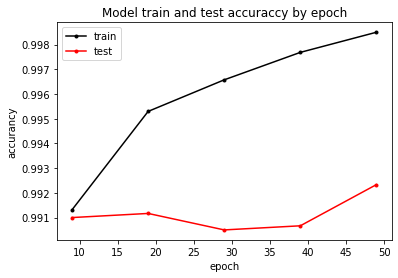

In [29]:
visualize_accuracy(epoch_history_dropout)

Experimentation - part iii)

In [30]:
#Adding another convolution layer to the previous model 
def create_cnn_etxralayer():
  # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3) ,
            activation= 'relu' ,
            kernel_initializer = 'he_uniform' ,
            input_shape =(28 , 28 , 1) 
        )
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2 , 2)))
    # Another Convolution layer
    model.add(
        Conv2D(64, (3, 3) ,
            activation= 'relu' ,
            kernel_initializer = 'he_uniform' ,
            input_shape =(28 , 28 , 1) 
        )
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2 , 2)))
    # Flat ten output
    model.add(Flatten())
    # Dense layer of 100 neurons
    model.add(
        Dense(100,
        activation = 'relu' ,
        kernel_initializer = 'he_uniform')
    )
    model.add(Dense(10, activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr = 0.01, momentum = 0.9)
    # compile model
    model.compile (
        optimizer = opt,
        loss = 'categorical_crossentropy' ,
        metrics = ['accuracy']
    )
    return model

In [31]:
extralayer_model = create_cnn_etxralayer()

In [32]:
#Run the training for 10 epochs with another convolution layer and maxpooling layer model 
epoch_history_extralayer = extralayer_model.fit(
    train_x,
    train_y, 
    batch_size = 32,
    epochs = 10,
    validation_split = 0.1
)

Epoch 1/10
1688/1688 [==============================] - 63s 37ms/step - loss: 0.1317 - accuracy: 0.9589 - val_loss: 0.0489 - val_accuracy: 0.9852
Epoch 2/10
1688/1688 [==============================] - 61s 36ms/step - loss: 0.0462 - accuracy: 0.9855 - val_loss: 0.0462 - val_accuracy: 0.9870
Epoch 3/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0334 - val_accuracy: 0.9902
Epoch 4/10
1688/1688 [==============================] - 62s 37ms/step - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 5/10
1688/1688 [==============================] - 61s 36ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0340 - val_accuracy: 0.9898
Epoch 6/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0.0367 - val_accuracy: 0.9900
Epoch 7/10
1688/1688 [==============================] - 60s 35ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0346 -

In [34]:
#Evaluating model with another convolution layer and maxpooling layer 
print("Evaluate on test data")
results = extralayer_model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 5s 64ms/step - loss: 0.0319 - accuracy: 0.9906
test loss, test acc: [0.03193626180291176, 0.9905999898910522]


Experimentation - part iv)

In [35]:
#Different Learning Rate  
def create_cnn_lr(learning_rate):
  # define using Sequential
    model = Sequential()
    # Convolution layer
    model.add(
        Conv2D(32, (3, 3) ,
            activation= 'relu' ,
            kernel_initializer = 'he_uniform' ,
            input_shape =(28 , 28 , 1) 
        )
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2 , 2)))
    # Another Convolution layer
    model.add(
        Conv2D(64, (3, 3) ,
            activation= 'relu' ,
            kernel_initializer = 'he_uniform' ,
            input_shape =(28 , 28 , 1) 
        )
    )
    # Maxpooling layer
    model.add(MaxPooling2D((2 , 2)))
    # Flat ten output
    model.add(Flatten())
    #add dropout
    model.add(Dropout(0.5))
    # Dense layer of 100 neurons
    model.add(
        Dense(100,
        activation = 'relu' ,
        kernel_initializer = 'he_uniform')
    )
    model.add(Dense(10, activation= 'softmax' ) )
    # initialize optimizer
    opt = SGD(lr = learning_rate, momentum = 0.9)
    # compile model
    model.compile (
        optimizer = opt,
        loss = 'categorical_crossentropy' ,
        metrics = ['accuracy']
    )
    return model

In [36]:
#Run the training for 10 epochs  for learning rate = 0.001
model_lr_001 = create_cnn_lr(0.001)
epoch_history_lr_001 = extralayer_model.fit(
    train_x,
    train_y, 
    batch_size = 32,
    epochs = 10,
    validation_split = 0.1
)

Epoch 1/10
1688/1688 [==============================] - 64s 38ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0398 - val_accuracy: 0.9918
Epoch 2/10
1688/1688 [==============================] - 62s 36ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0351 - val_accuracy: 0.9922
Epoch 3/10
1688/1688 [==============================] - 62s 36ms/step - loss: 4.8770e-04 - accuracy: 1.0000 - val_loss: 0.0372 - val_accuracy: 0.9928
Epoch 4/10
1688/1688 [==============================] - 61s 36ms/step - loss: 3.7591e-04 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9923
Epoch 5/10
1688/1688 [==============================] - 65s 38ms/step - loss: 8.4890e-04 - accuracy: 0.9999 - val_loss: 0.0365 - val_accuracy: 0.9933
Epoch 6/10
1688/1688 [==============================] - 62s 37ms/step - loss: 2.0825e-04 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 0.9928
Epoch 7/10
1688/1688 [==============================] - 63s 37ms/step - loss: 1.5973e-04 - accuracy: 1.0000 

In [37]:
#Evaluating model for learning rate = 0.001
print("Evaluate on test data")
results = model_lr_001.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 3s 33ms/step - loss: 2.4108 - accuracy: 0.1293
test loss, test acc: [2.410837173461914, 0.12929999828338623]


In [ ]:
#Run the training for 10 epochs for learning rate = 0.1
model_lr_1 = create_cnn_lr(0.1)
epoch_history_lr_1 = extralayer_model.fit(
    train_x,
    train_y, 
    batch_size = 32,
    epochs = 10,
    validation_split = 0.1
)

Epoch 1/10
1688/1688 [==============================] - 66s 39ms/step - loss: 9.0628e-05 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9930
Epoch 2/10
1688/1688 [==============================] - 63s 38ms/step - loss: 8.2005e-05 - accuracy: 1.0000 - val_loss: 0.0409 - val_accuracy: 0.9930
Epoch 3/10
1688/1688 [==============================] - 70s 41ms/step - loss: 7.5751e-05 - accuracy: 1.0000 - val_loss: 0.0415 - val_accuracy: 0.9930
Epoch 4/10
1688/1688 [==============================] - 61s 36ms/step - loss: 7.0845e-05 - accuracy: 1.0000 - val_loss: 0.0417 - val_accuracy: 0.9930
Epoch 5/10
1688/1688 [==============================] - 63s 38ms/step - loss: 6.6104e-05 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9928
Epoch 6/10
1688/1688 [==============================] - 62s 36ms/step - loss: 6.2480e-05 - accuracy: 1.0000 - val_loss: 0.0416 - val_accuracy: 0.9925
Epoch 7/10
1688/1688 [==============================] - 64s 38ms/step - loss: 5.8790e-05 - accuracy:

In [39]:
#Evaluating model for learning rate = 0.1
print("Evaluate on test data")
results = model_lr_1.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 5s 60ms/step - loss: 2.8375 - accuracy: 0.0954
test loss, test acc: [2.837472915649414, 0.09539999812841415]


Random Forests for Image Approximation

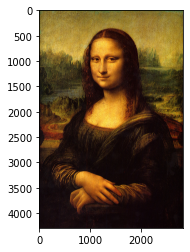

In [42]:
import matplotlib.image as mpimg
import random
mona_lisa = mpimg.imread('Mona_Lisa.jpeg')
plt.imshow(mona_lisa)

Preprocessing the input

In [49]:
#uniformly sample 5,000 random (x , y ) coordinate locations
def training_set(img, size):
    X = []
    Y = []
    nrow, ncol = len(img), len(img[0])
    for i in range(size):
        row = random.randint(0, nrow-1)
        col = random.randint(0, ncol-1)
        X.append((row, col))
        Y.append(img[row, col])
    return X, Y

In [50]:
train_X, train_Y = training_set(mona_lisa, 5000)
print(len(train_X), len(train_Y))
train_X[0], train_Y[0]

5000 5000


((2869, 2769), array([39, 24, 19], dtype=uint8))

Preprocessing the output

In [51]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False)
regr.fit(train_X, train_Y)

RandomForestRegressor(bootstrap=False, max_depth=2, n_estimators=1)

Random Forest Model 

In [54]:
def get_img(model, image):
    img_copy = np.copy(image)
    width, height = len(img[0]), len(image)
    for i in range(height):
        row_ind = []
        for j in range(width):
            row_ind.append((i, j))
        img_copy[i] = model.predict(row_ind)
    return img_copy

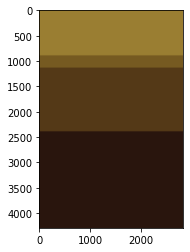

In [55]:
img = get_img(regr, mona_lisa)
plt.imshow(img)

Experimentation - part i)

In [56]:
#various Depths 
def get_rf_img(depth, n_estimator):
    this_regr = RandomForestRegressor(
        max_depth=depth, 
        n_estimators=1
    )
    this_regr.fit(train_X, train_Y)
    return get_img(this_regr, mona_lisa)

Various Depths 

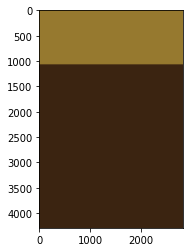

In [57]:
# for depth = 1
plt.imshow(get_rf_img(1, 1))

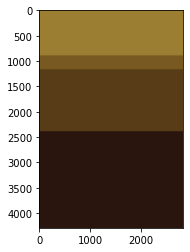

In [58]:
# for depth = 2
plt.imshow(get_rf_img(2, 1))

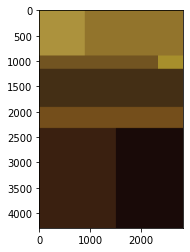

In [59]:
# for depth = 3
plt.imshow(get_rf_img(3, 1))

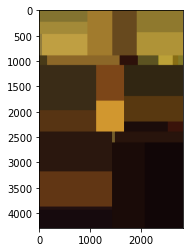

In [60]:
# for depth = 5
plt.imshow(get_rf_img(5, 1))

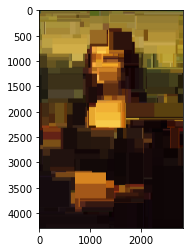

In [61]:
# for depth = 10
plt.imshow(get_rf_img(10, 1))

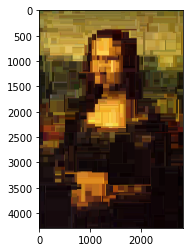

In [62]:
# for depth = 15
plt.imshow(get_rf_img(15, 1))

Experimentation - part ii) - variation in number of tree 

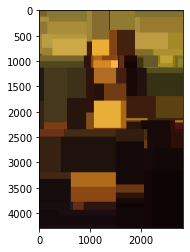

In [63]:
#number of decision trees = 1
plt.imshow(get_rf_img(7, 1))

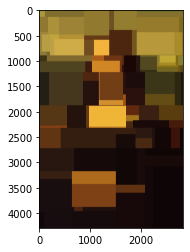

In [64]:
#number of decision trees = 3
plt.imshow(get_rf_img(7, 3))

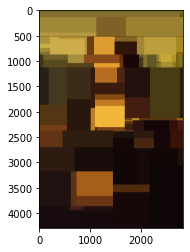

In [65]:
#number of decision trees = 5
plt.imshow(get_rf_img(7, 5))

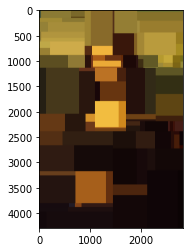

In [66]:
#number of decision trees = 10
plt.imshow(get_rf_img(7, 10))

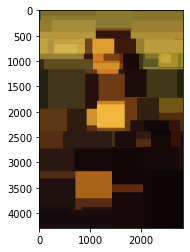

In [67]:
#number of decision trees = 100
plt.imshow(get_rf_img(7, 100))

Experimentation - part iii) - k -NN regressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = KNeighborsRegressor(n_neighbors=1)
neighbors.fit(train_X, train_Y)

KNeighborsRegressor(n_neighbors=1)

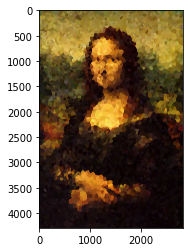

In [71]:
plt.imshow(get_img(neighbors, mona_lisa))

Experimentation - part iV) - pruning strategies 

In [72]:
# Changing sample leaf & min split values 
def get_rf_img_pruning(depth, n_estimators, sample_leaf, min_split):
    this_regr = RandomForestRegressor(
        max_depth=depth, 
        n_estimators= n_estimators,
        min_samples_leaf=sample_leaf, # default 1
        min_samples_split=min_split # default 2
    )
    this_regr.fit(train_X, train_Y)
    return get_img(this_regr, mona_lisa)

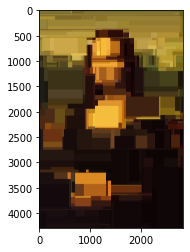

In [73]:
# no of sample leaf = 1
plt.imshow(get_rf_img_pruning(10, 1, 1, 2)) 

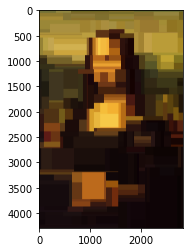

In [74]:
#no of sample leaf = 5
plt.imshow(get_rf_img_pruning(10, 1, 5, 2)) 

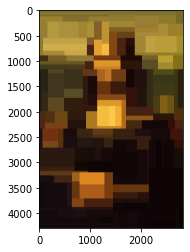

In [75]:
# no of sample leaf = 10
plt.imshow(get_rf_img_pruning(10, 1, 10, 2)) 

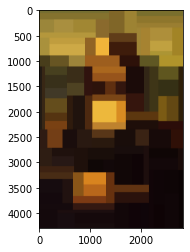

In [76]:
# no of sample leaf = 20
plt.imshow(get_rf_img_pruning(10, 1, 20, 2))

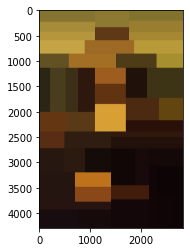

In [77]:
# no of sample leaf = 50
plt.imshow(get_rf_img_pruning(10, 1, 50, 2)) 

Varying minimum of sample split 

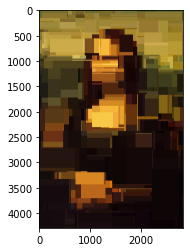

In [78]:
# min no of sample split = 2 - minimum possible value
plt.imshow(get_rf_img_pruning(10, 1, 1, 2)) 

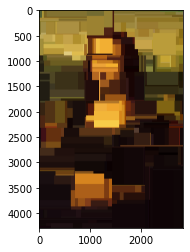

In [79]:
# min no of sample split = 5
plt.imshow(get_rf_img_pruning(10, 1, 1, 5)) 

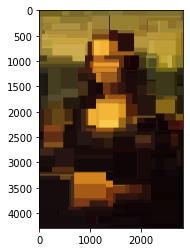

In [80]:
# min no of sample split = 10
plt.imshow(get_rf_img_pruning(10, 1, 1, 10)) 

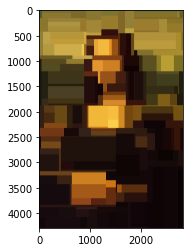

In [81]:
# min no of sample split = 20
plt.imshow(get_rf_img_pruning(10, 1, 1, 20)) 

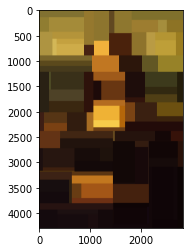

In [82]:
# min no of sample split = 50
plt.imshow(get_rf_img_pruning(10, 1, 1, 50)) 